# Changelog

### Version 18

* Use additional dataset from https://www.kaggle.com/shymammoth/shopee-reviews
* No longer modify y_train

### Version 14

* Replace Bag of Words (BoW) with TF-IDF

### Version 13

* Use NaiveBayes
* Use Bigram
* Change all y_train rating 4->5

### Version 12

* Replace TF-IDF with Bag of Words (BoW)

### Version 11

* Change replace char & delete remove char
* Set `min_df=20` for TF-IDF
* Use SVM (with GridSearchCV)
* Enable replace/remove char

### Version 6

* Add Confusion Matrix
* Set `min_df=5` for TF-IDF
* Import library used to set SEED
* Lemmatization for EN & Stemming for ID
* Disable replace/remove char
* Revert RandomForestClassifier parameter

### Version 5

* Change RandomForestClassifier parameter
* Set SEED

### Version 4

* Use RandomForestClassifier
* `min_df=20` for TF-IDF
* Change generic model function position

### Version 3

* Fix submission.csv column name

### Version 2

* Use MultinomialNB

### Version 1

* Initialize code

# Library

In [1]:
!pip install pyenchant pysastrawi

     |████████████████████████████████| 55 kB 1.6 MB/s 
     |████████████████████████████████| 210 kB 14.3 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/libr/libreoffice-dictionaries/hunspell-id_6.4.3-1_all.deb
!dpkg -i hunspell-id_6.4.3-1_all.deb

--2020-07-30 07:26:21--  http://archive.ubuntu.com/ubuntu/pool/main/libr/libreoffice-dictionaries/hunspell-id_6.4.3-1_all.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.88.152, 91.189.88.142, 2001:67c:1562::18, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.88.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143836 (140K) [application/x-debian-package]
Saving to: ‘hunspell-id_6.4.3-1_all.deb’

hunspell-id_6.4.3-1 100%[===================>] 140.46K   249KB/s    in 0.6s    

2020-07-30 07:26:22 (249 KB/s) - ‘hunspell-id_6.4.3-1_all.deb’ saved [143836/143836]

Selecting previously unselected package hunspell-id.
(Reading database ... 107461 files and directories currently installed.)
Preparing to unpack hunspell-id_6.4.3-1_all.deb ...
Unpacking hunspell-id (1:6.4.3-1) ...
Setting up hunspell-id (1:6.4.3-1) ...


In [3]:
!apt update && apt install -y enchant libenchant1c2a hunspell hunspell-en-us libhunspell-1.6-0

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://packages.cloud.google.com/apt gcsfuse-bionic InRelease [3724 B]
Get:5 http://packages.cloud.google.com/apt cloud-sdk-bionic InRelease [6384 B]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [880 kB]
Get:8 http://packages.cloud.google.com/apt cloud-sdk InRelease [6349 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [1413 kB]
Get:10 http://packages.cloud.google.com/apt cloud-sdk-bionic/main amd64 Packages [132 kB]
Get:11 http://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [124 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [9555 B]
Get:13 http://security.ubuntu.com/ubuntu bionic-

In [4]:
import re
import os
import gc
import random

import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import enchant

In [5]:
!pip freeze > requirements.txt

In [6]:
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Scikit-Learn version:', sklearn.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Seaborn version:', sns.__version__)
print('NLTK version:', nltk.__version__)

Numpy version: 1.18.5
Pandas version: 1.0.3
Scikit-Learn version: 0.23.1
Matplotlib version: 3.2.1
Seaborn version: 0.10.0
NLTK version: 3.2.4


In [7]:
SEED = 42

os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Dataset

In [9]:
!ls -lha /kaggle/input
!ls -lha /kaggle/input/student-shopee-code-league-sentiment-analysis

total 16K
drwxr-xr-x 4 root   root    4.0K Jul 30 07:25 .
drwxr-xr-x 6 root   root    4.0K Jul 30 07:25 ..
drwxr-xr-x 2 nobody nogroup 4.0K Jul 29 19:02 shopee-reviews
drwxr-xr-x 2 nobody nogroup 4.0K Jul 20 08:34 student-shopee-code-league-sentiment-analysis
total 21M
drwxr-xr-x 2 nobody nogroup 4.0K Jul 20 08:34 .
drwxr-xr-x 4 root   root    4.0K Jul 30 07:25 ..
-rw-r--r-- 1 nobody nogroup   63 Jul 20 08:34 sampleSubmission.csv
-rw-r--r-- 1 nobody nogroup 5.9M Jul 20 08:34 test.csv
-rw-r--r-- 1 nobody nogroup  15M Jul 20 08:34 train.csv


In [10]:
df_train = pd.read_csv('/kaggle/input/student-shopee-code-league-sentiment-analysis/train.csv')
df_train.sample(10)

,review_id,review,rating
131527,131527,Awesome speed of the ship! Awesome awesome qu...,5
113698,113698,Excellent product quality excellent product q...,5
43257,43257,The product price is good Packing safe superrr...,3
62339,62339,Product quality good price good product deliv...,3
109954,109954,seller very responsive❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️,5
64301,64301,CP values ​​awesome awesome product quality,4
24963,24963,It looks like the price is too expensive with ...,2
80033,80033,Excellent service by seller,4
141803,141803,The product quality is excellent. The origina...,5
35302,35302,Good quality Box is no longer in good conditi...,3


In [11]:
df_train2 = pd.read_csv('/kaggle/input/shopee-reviews/shopee_reviews.csv')

def to_int(r):
    try:
        return np.int32(r)
    except:
        return np.nan

df_train2['label'] = df_train2['label'].apply(to_int)
df_train2 = df_train2.dropna()
df_train2['label'] = df_train2['label'].astype(np.int32)
df_train2

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,label,text
0,5,Looks ok. Not like so durable. Will hv to use ...
1,5,"Tried, the current can be very powerful depend..."
2,5,Item received after a week. Looks smaller than...
3,5,Thanks!!! Works as describe no complaints. Not...
4,5,Fast delivery considering it’s from overseas a...
...,...,...
1502570,5,Tried and it fit nicely will buy \nFast and go...
1502571,5,It's a fantastic product. Very reasonable pric...
1502572,5,Nice pair of shoes for a gd price. Note the cu...
1502573,1,Leather? Rubbish....moulded plastic. What a ...


In [12]:
df_test = pd.read_csv('/kaggle/input/student-shopee-code-league-sentiment-analysis/test.csv')
df_test.sample(10)

,review_id,review
28278,28279,Alhamdulillah finally got jg goods seller nya....
59033,59034,The light weight would probably make them good...
60224,60225,"Food items correct, Baocunlianghao Oh. Items a..."
37863,37864,Ceppppeeetttt bangett ni aja ve until we order...
53082,53083,Super-positive rate of shipments of goods awes...
20995,20996,excelent product
22085,22086,"Very fast deliery, yesterday Oder Kedah today ..."
41185,41186,Awesome speed of the ship awesome awesome qua...
21457,21458,Very comfortable
37979,37980,they are not supportive enough or firm enough ...


In [13]:
X_train = pd.concat([df_train['review'], df_train2['text']], axis=0)
X_train = X_train.reset_index(drop=True)
y_train = pd.concat([df_train['rating'], df_train2['label']], axis=0)
y_train = y_train.reset_index(drop=True)

X_test = df_test['review']

# Class weight

In [14]:
rating_count = y_train.value_counts().sort_index().to_list()
total_rating = sum(rating_count)
lowest_rating_count = min(rating_count)
rating_weight = [lowest_rating_count/rc for rc in rating_count]

print(rating_count)
print(total_rating)
print(rating_weight)

[43139, 31781, 85024, 143994, 1345447]
1649385
[0.7367115603050604, 1.0, 0.3737885773428679, 0.2207105851632707, 0.023621145983453825]


In [15]:
class_weight = np.empty((total_rating,))
for i in range(total_rating):
    class_weight[i] = rating_weight[y_train[i] - 1]

# Preprocess

In [16]:
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

lemmatizer = WordNetLemmatizer() # for en
factory = StemmerFactory() # for id
stemmer = factory.create_stemmer() # for id

tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

eng_dict = enchant.Dict('en')
ind_dict = enchant.Dict('id_ID')

def remove_char(text):
    text = re.sub(r'[^a-z ]', ' ', text)
    return text


def stem_lemma(tokens):
    new_token = []
    for token in tokens:
        if eng_dict.check(token):
            new_token.append(lemmatizer.lemmatize(token))
        elif ind_dict.check(token):
            new_token.append(stemmer.stem(token))
        else:
            new_token.append(token)
    return new_token

def upper_or_lower(tokens):
    new_token = []
    for token in tokens:
        total_lower = len(re.findall(r'[a-z]',token))
        total_upper = len(re.findall(r'[A-Z]',token))
        if total_lower == 0 or total_upper == 0:
            new_token.append(token)
        elif total_lower > total_upper:
            new_token.append(token.lower())
        else:
            new_token.append(token.upper())
    return new_token
    

def preprocess(X):
    X = X.apply(tweet_tokenizer.tokenize)
    X = X.apply(lambda token: [t for t in token if t != ''])
    X = X.apply(upper_or_lower)
    X = X.apply(stem_lemma)
#     X = X.apply(lambda token: ' '.join(token)) # need to join token because sklearn tf-idf only accept string, not list of string
    
#     X = X.apply(remove_char)
    return X

In [17]:
X_train = preprocess(X_train)
X_test = preprocess(X_test)

In [18]:
X_train.sample(10)

752370     [item, received, ,, good, quality, and, workin...
1282336    [item, received, a, described, and, in, good, ...
1473734          [good, product, !, !, !, fast, delivery, 👍]
1052211    [delivery, time, not, that, bad, ., can, ’, t,...
1120389    [the, size, s, pant, were, too, big, for, me, ...
794160     [lousy, product, ., it, work, for, around, 5, ...
282132     [good, brush, ., havent, try, yet, but, i, bel...
727173     [very, happy, with, this, buy, ., ordered, on,...
1284409    [received, a, per, advised, delivery, date, .,...
1088639    [item, wa, well, packaged, and, delivered, ver...
dtype: object

# Word representation

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

bow_vectorizer = TfidfVectorizer(lowercase=False, ngram_range=(1,2), analyzer=lambda t:t, min_df=5, sublinear_tf=True)

X_train = bow_vectorizer.fit_transform(X_train)
X_test = bow_vectorizer.transform(X_test)


In [20]:
print(X_train.shape)
print(X_test.shape)

(1649385, 27753)
(60427, 27753)


# Model functions

In [21]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix

def predict(model, X):
    y = model.predict(X)
    return y

def metrics(y_true, y_pred):
    print('F1 Score :', f1_score(y_true, y_pred, average='macro'))
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, [1,2,3,4,5], [1,2,3,4,5])

    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
    plt.show()

# MultinomialNB

In [22]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train, class_weight)

MultinomialNB()

F1 Score : 0.4193861236669923
              precision    recall  f1-score   support

           1       0.29      0.69      0.41     43139
           2       0.15      0.49      0.23     31781
           3       0.28      0.36      0.31     85024
           4       0.22      0.44      0.30    143994
           5       0.96      0.75      0.84   1345447

    accuracy                           0.70   1649385
   macro avg       0.38      0.55      0.42   1649385
weighted avg       0.83      0.70      0.74   1649385



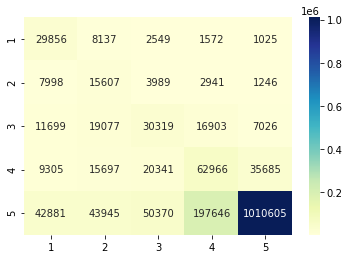

In [23]:
y_train_pred = predict(clf, X_train)
metrics(y_train, y_train_pred)

In [24]:
y_test_pred = predict(clf, X_test)

df_submission = pd.concat([df_test['review_id'], pd.Series(y_test_pred, name='rating')], axis=1)
df_submission.to_csv('submission_MultinomialNB.csv', index=False)

df_submission

,review_id,rating
0,1,3
1,2,3
2,3,5
3,4,5
4,5,5
...,...,...
60422,60423,4
60423,60424,2
60424,60425,4
60425,60426,2


# ComplementNB

In [25]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train, y_train, class_weight)

ComplementNB()

F1 Score : 0.417531821796749
              precision    recall  f1-score   support

           1       0.24      0.76      0.36     43139
           2       0.16      0.42      0.23     31781
           3       0.32      0.30      0.31     85024
           4       0.28      0.31      0.30    143994
           5       0.94      0.83      0.88   1345447

    accuracy                           0.75   1649385
   macro avg       0.39      0.53      0.42   1649385
weighted avg       0.82      0.75      0.77   1649385



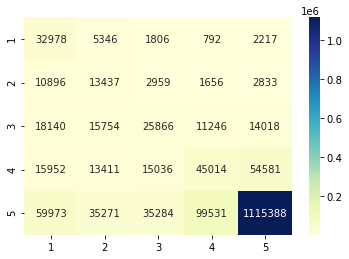

In [26]:
y_train_pred = predict(clf, X_train)
metrics(y_train, y_train_pred)

In [27]:
y_test_pred = predict(clf, X_test)

df_submission = pd.concat([df_test['review_id'], pd.Series(y_test_pred, name='rating')], axis=1)
df_submission.to_csv('submission_ComplementNB.csv', index=False)

df_submission

,review_id,rating
0,1,3
1,2,1
2,3,5
3,4,5
4,5,5
...,...,...
60422,60423,4
60423,60424,2
60424,60425,4
60425,60426,1


# RandomForestClassifier

In [28]:
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(random_state=SEED)
# clf.fit(X_train, y_train)

In [29]:
# y_train_pred = predict(clf, X_train)
# metrics(y_train, y_train_pred)

In [30]:
# y_test_pred = predict(clf, X_test)

# df_submission = pd.concat([df_test['review_id'], pd.Series(y_test_pred, name='rating')], axis=1)
# df_submission.to_csv('submission.csv', index=False)

# df_submission

# SVM

In [31]:
# from sklearn.svm import SVC

# clf = SVC(kernel='rbf', C=1, cache_size=10240)
# clf.fit(X_train, y_train)

In [32]:
# y_train_pred = predict(clf, X_train)
# metrics(y_train, y_train_pred)

In [33]:
# y_test_pred = predict(clf, X_test)

# df_submission = pd.concat([df_test['review_id'], pd.Series(y_test_pred, name='rating')], axis=1)
# df_submission.to_csv('submission.csv', index=False)

# df_submission